In [26]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import os

plt.rcParams['figure.figsize']=(20,8)

In [27]:
def average(matches):
    total=0
    for match in matches:
        total+=match.distance

    return total/len(matches)

In [31]:
def get_similar(filename):
    images=os.listdir('images')
    query=cv2.imread(filename)
    query=cv2.cvtColor(query, cv2.COLOR_BGR2RGB)
    query_gray=cv2.cvtColor(query, cv2.COLOR_BGR2GRAY)
    
    results=[]

    for image in tqdm(images, total=len(images)):
        img=cv2.imread(f'images/{image}')
        img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        gray_img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        sift=cv2.SIFT_create()
        keypoints1, descriptor1=sift.detectAndCompute(query_gray, None)
        keypoints2, descriptor2=sift.detectAndCompute(gray_img, None)

        bf=cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
        matches=bf.match(descriptor1, descriptor2)

        results.append([img,average(matches)])
    
    results=sorted(results, key=lambda x:x[1])
        # matches=sorted(matches, key=lambda x:x.distance)
        # img3=cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches[:50], img2, flags=2)
    plt.figure(figsize=(4,4))
    plt.imshow(query)
    plt.title('Query Image')

    plt.figure(figsize=(20,20))
    f,ax=plt.subplots(1,3)
    ax[0].imshow(results[0][0])
    ax[0].set_title('Similar #1')
    ax[1].imshow(results[1][0])
    ax[1].set_title('Similar #2')
    ax[2].imshow(results[2][0])
    ax[2].set_title('Similar #3')
    plt.show()

100%|██████████| 23/23 [00:31<00:00,  1.37s/it]


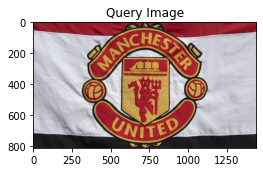

<Figure size 1440x1440 with 0 Axes>

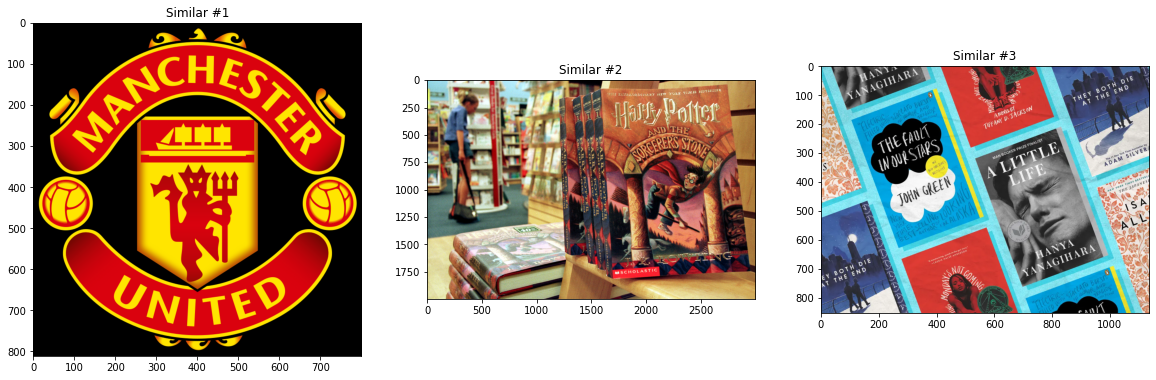

In [32]:
get_similar('./query_images/logo.webp')